In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

In [19]:
num_inputs = 2
num_examples = 1000
true_w = [2.0, -3.4]
true_b = [4.2]
features = np.random.normal(scale=0.01, size=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += np.r
andom.normal(scale=0.01, size=labels.shape)    # 增加 noise

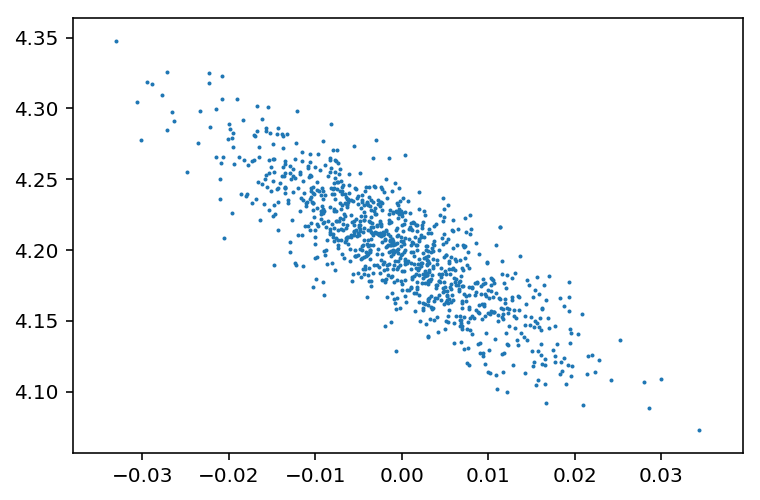

In [20]:
from IPython.display import set_matplotlib_formats
def set_figsize(figsize=(3.5, 2.5)):
    set_matplotlib_formats('retina')            # 高清
    plt.rcParams['figure.figsize'] = figsize    # 設置圖的尺寸
    
set_figsize(figsize=(6, 4))
plt.scatter(features[:, 1], labels, 1)
plt.show()

In [21]:
batch_size = 10
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis=0), labels.take(j, axis=0)

In [26]:
learning_rate = 0.03

x = tf.placeholder(shape=(None, num_inputs), dtype=tf.float32)
y = tf.placeholder(shape=(None, 1), dtype=tf.float32)

w = tf.Variable(np.random.normal(scale=0.01, size=(num_inputs, 1)), dtype=tf.float32)
b = tf.Variable(np.zeros(shape=(1,)), dtype=tf.float32)

y_hat = tf.add(tf.matmul(x, w), b)

loss = tf.reduce_mean(tf.reduce_sum(tf.pow(y-y_hat, 2)))

grad_w, grad_b = tf.gradients(loss, [w, b])

new_w = tf.assign(w, w - learning_rate * grad_w)
new_b = tf.assign(b, b - learning_rate * grad_b)

In [35]:
epochs = 1000
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1, epochs+1):
        for batch_x, batch_y, in data_iter(batch_size, features, labels):
            batch_y = batch_y.reshape(-1, 1)
            _, _, l = sess.run([new_w, new_b, loss], feed_dict={x: batch_x, y: batch_y})
        if epoch % 100 == 0:    
            print(sess.run(loss, feed_dict={x: batch_x, y: batch_y}).mean())
    print(sess.run([w, b]))

0.0077971118
0.0018611286
0.000850329
0.0006234764
0.00065647345
0.0015229875
0.00078728155
0.00058159523
0.0013510311
0.00036220596
[array([[ 2.0219417],
       [-3.3985372]], dtype=float32), array([4.2010875], dtype=float32)]
